In [4]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from utils import matplotlib_setup, extract_sampler_names
%matplotlib inline

In [22]:
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
markers = ['>','*','<','o','^']
LINEWIDTH = 12
MSIZE = 40
MEDGESIZE = 12
det_metrics = ['any','majority','all']
eval_type=det_metrics[2]
K=10
FILTERED =False
prefix = 'FAR_RF_FC_K_{}_'.format(K)
outfile_regex = prefix+'{}.png'
def get_dataroot():
    return '/data/juma/data/ids18/'

In [6]:
def get_sampling_dirs(a_dir, only=''):
    dirs = [os.path.join(a_dir, name) for name in os.listdir(a_dir) 
                if os.path.isdir(os.path.join(a_dir, name)) and name.endswith('_l') ]
    return sorted(dirs)

In [19]:

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'
def get_ben_obsr_rate(d):
    df = pd.read_csv(join(d,'observation_rate.csv'))
    return df[df['Label']=='Benign']['Observation rate'].values[0]

def get_avg_abs_recall(d,eval_type):
    fn=None
    ben_obsr = get_ben_obsr_rate(d)

    avg_recall_file = 'fold_avg_'.format(K)+eval_type+'.csv'
    d = join(d,classifier_fingerprint)
    if 'WS' in d:
        fn = join(d,'eval','fold_test{}.csv'.format(eval_type))
    elif K>5:
        fn = join(d,'K_{}/eval'.format(K),avg_recall_file)
    else:
        fn = join(d,'K/eval'.format(K),avg_recall_file)
    
    df = pd.read_csv(fn)
    far = (100 - df[df['Label']=='Benign']['Rc'].values[0])*ben_obsr/100.
    return far,None,None

In [11]:
xtick_labels = ['100%','10%','1%','0.1%']#,'5%','1%','0.5','0.1%']
xtick_indices = np.arange(len(xtick_labels))
classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'

outfile /data/juma/data/ids18/CSVs_r_1.0_m_1.0/WS_l/FAR_RF_FC_K_10_all.png


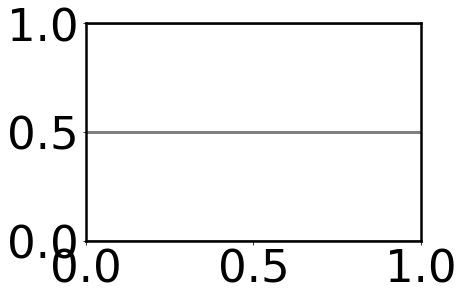

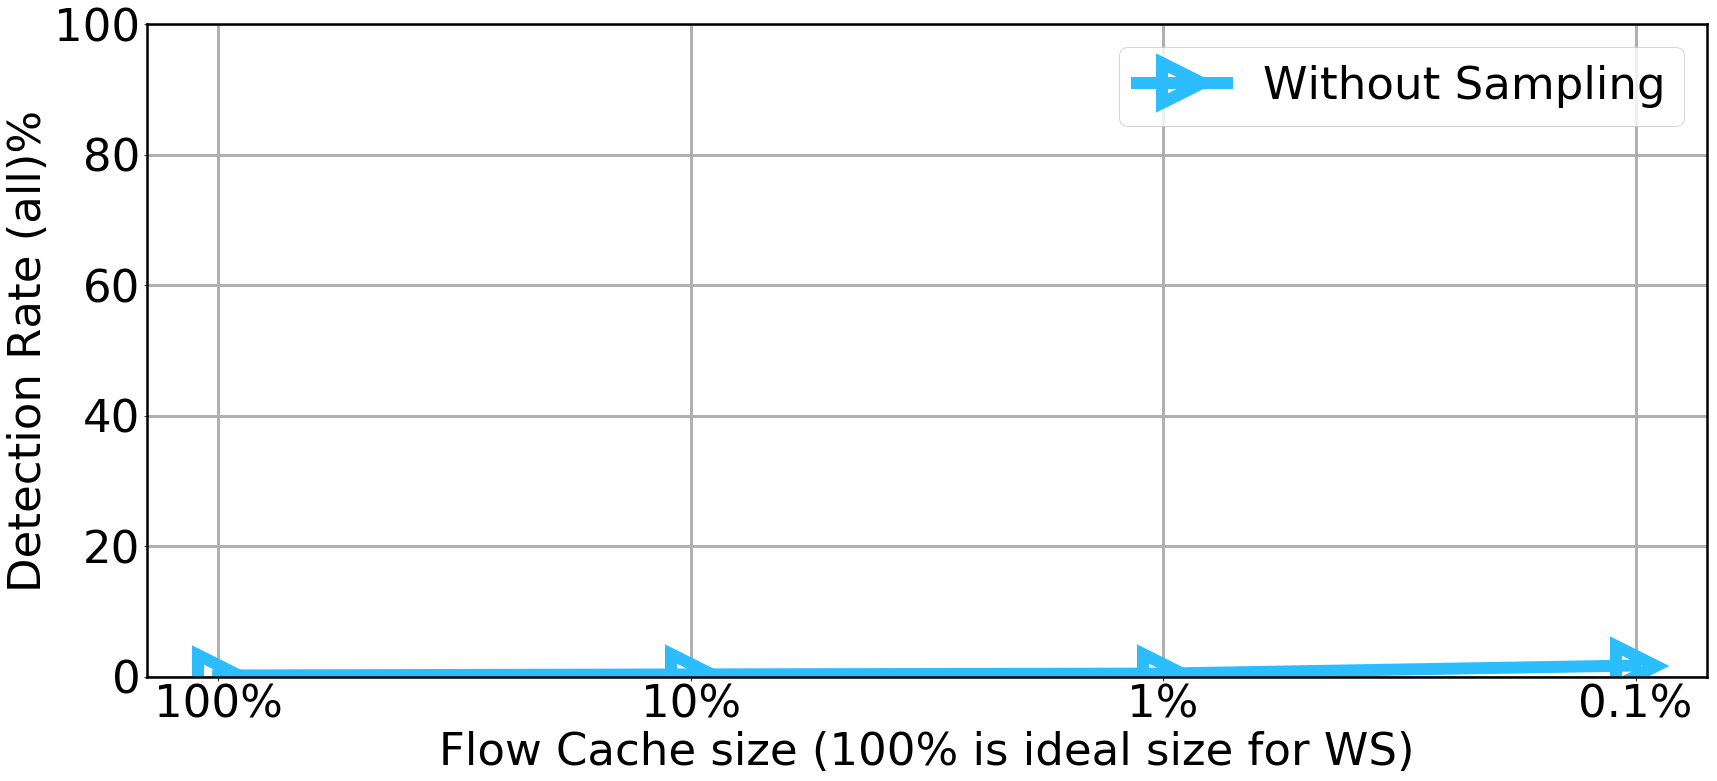

In [23]:
WS_dirs = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/WS_l/',
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/WS_l/',
         '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/WS_l/',           
         '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/WS_l/',
        ]
recalls = defaultdict(list)

avg_abs_rcs = [get_avg_abs_recall(d,eval_type=eval_type) for d in WS_dirs]
for i in range(len(avg_abs_rcs)):
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls['WS'].append(avg_dr)
        
#drawing
matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
ax.plot(np.arange(len(WS_dirs)),recalls['WS'],label='Without Sampling',linewidth=LINEWIDTH,marker=markers[0],markersize=MSIZE,\
        markeredgewidth=MEDGESIZE,markerfacecolor='none')
ax.set_ylim(0,100)

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(WS_dirs[0],outfile_regex.format(eval_type))
print('outfile', outfile)
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

In [15]:
sr_dir = 'SR_10.0'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]


recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(d,eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/10: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(55,95)
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10.0/'

Fast Filtered Sampling [0.46371000000000073, 0.46371000000000073, 0.4125829999999999, 0.40188199999999946]
SketchFlow Sampling [0.20271299999999987, 0.20271299999999987, 0.18213299999999957, 0.18213299999999957]
Sketch Guided Sampling [1.0820880000000006, 6.659999999999997, 0.9745119999999994, 1.021971999999999]
Simple Random Sampling [0.5533919999999994, 0.5533919999999994, 0.5034959999999997, 0.49328999999999934]


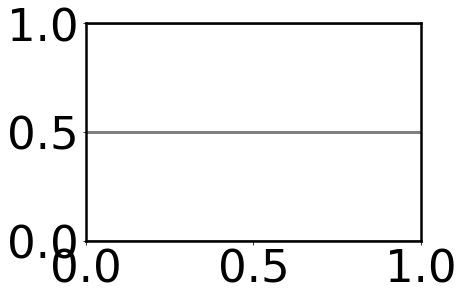

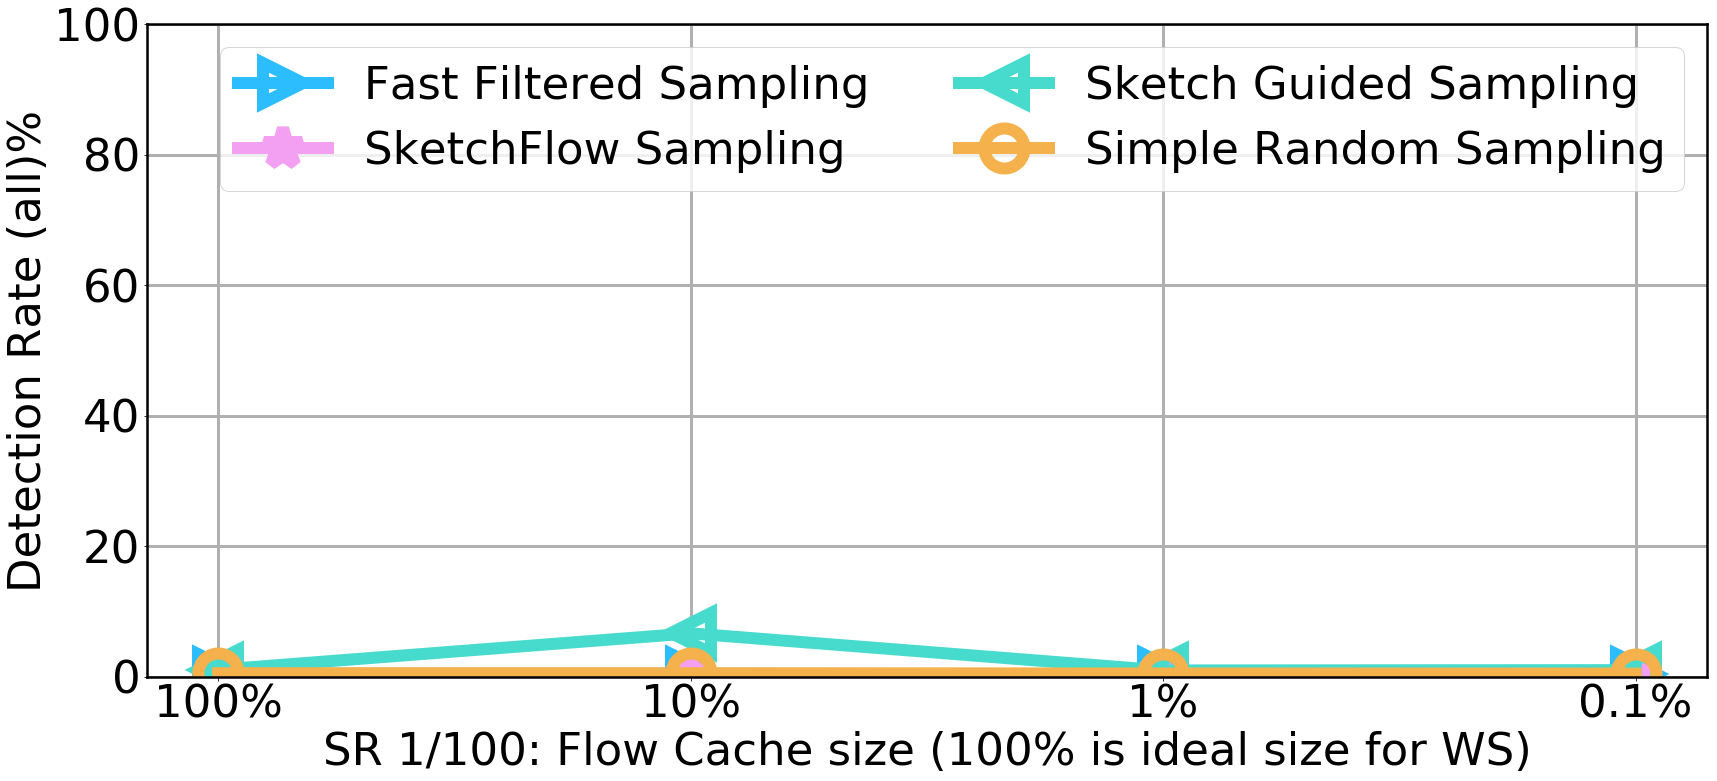

In [24]:
sr_dir = 'SI_100'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'

recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(d,eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/100: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

Fast Filtered Sampling [12.198461538461537, 12.198461538461537, 12.198461538461537, 12.33]
SketchFlow Sampling [15.093846153846155, 15.093846153846155, 15.080769230769231, 15.072307692307692]
Sketch Guided Sampling [6.4861538461538455, 6.486923076923077, 6.503846153846153, 6.507692307692308]
Simple Random Sampling [12.162307692307694, 12.162307692307694, 12.162307692307694, 12.286923076923078]


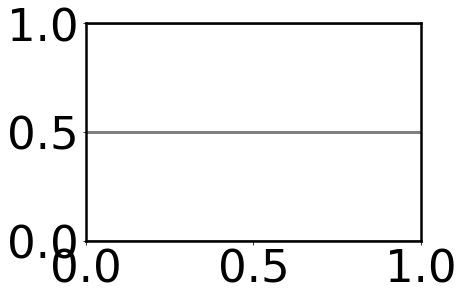

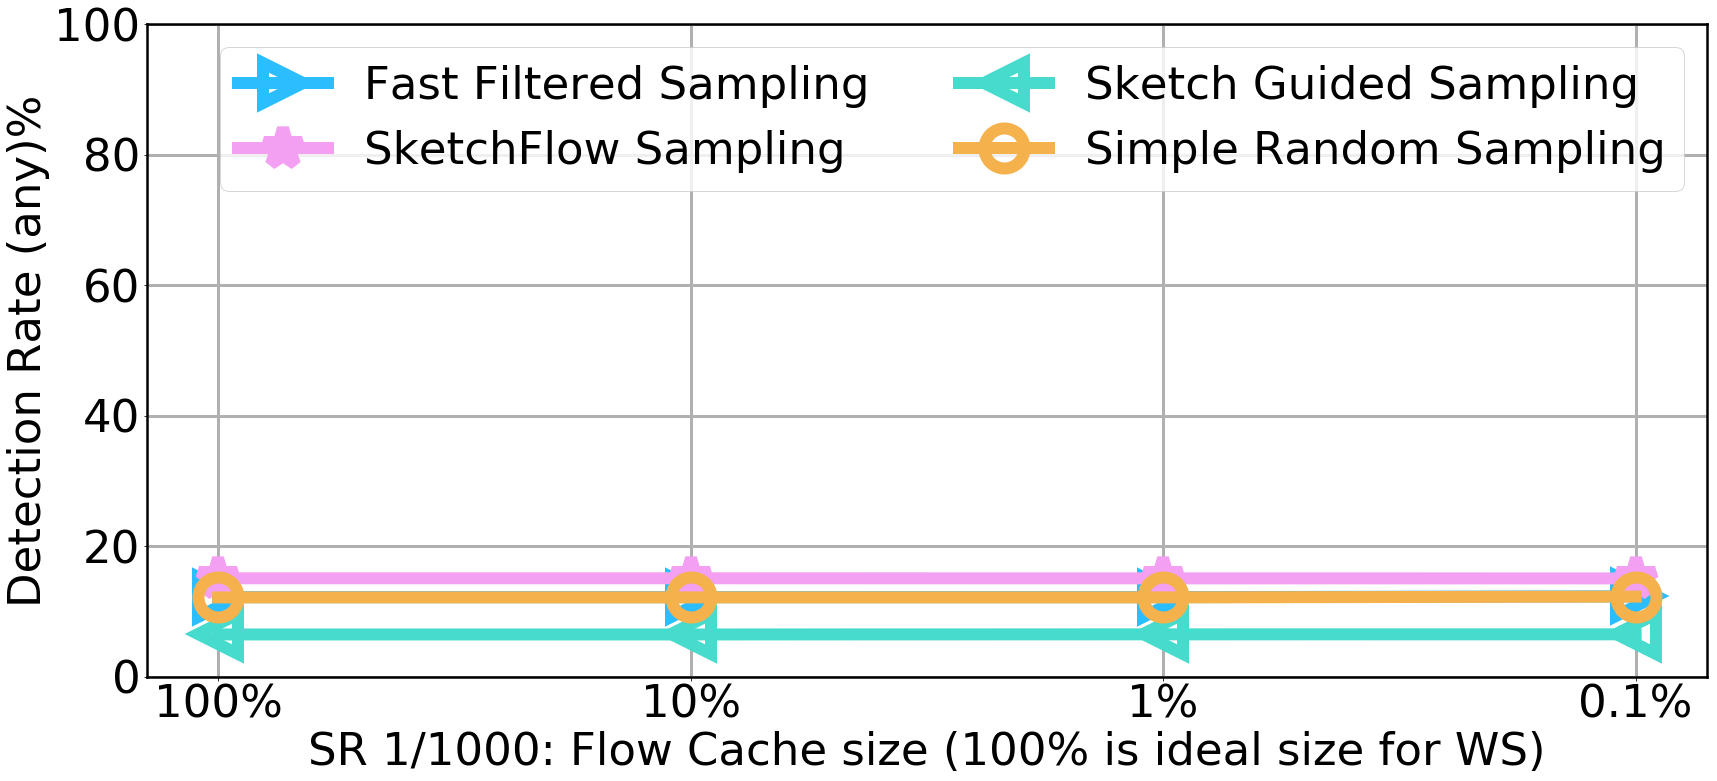

In [30]:
sr_dir = 'SR_0.1'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),

        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'



recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')
    
plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/1000: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()